In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats


In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## <center> APREPROCESAMIENTO DE DATOS </center> ##

In [5]:
print("numero filas " + str(df.shape[0]))   
print("numero columnas " + str(df.shape[1]))
print("\n")

numero filas 891
numero columnas 15




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


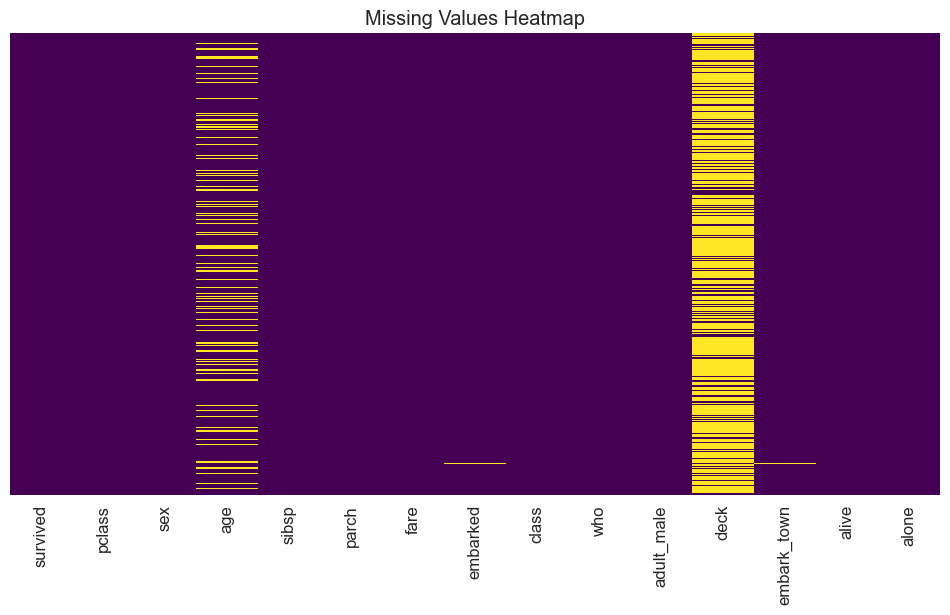

In [7]:
# Create a heatmap to visualize missing values in the dataset
# Each missing value appears as a colored cell, non-missing values are not colored
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [8]:
#crear funcion que dependiendo del tipo de columna, arregle los nuls
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
def reparar_nulos(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'float64' or df[col].dtype == 'int64':
                # Repara con la mediana
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # Repara con la moda
                df[col].fillna(df[col].mode()[0], inplace=True)
                # .mode() - Calcula la moda (valor(es) más frecuente(s)), devuelve una Serie
                # [0] - Toma el primer valor de la moda (por si hay varios valores con la misma frecuencia)
                # .fillna(...) - Rellena los valores NaN/nulos
                # inplace=True - Modifica el DataFrame original directamente, sin crear una copia
    return df

In [10]:
reparar_nulos(df)

C:\Users\Joaquim\AppData\Local\Temp\ipykernel_27812\3598206900.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Joaquim\AppData\Local\Temp\ipykernel_27812\3598206900.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df.duplicated().sum()

np.int64(112)

### estudiar las filas duplicadas y ver si es necesario eliminarlas

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### EDA - Analisis exploratorio de datos


In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

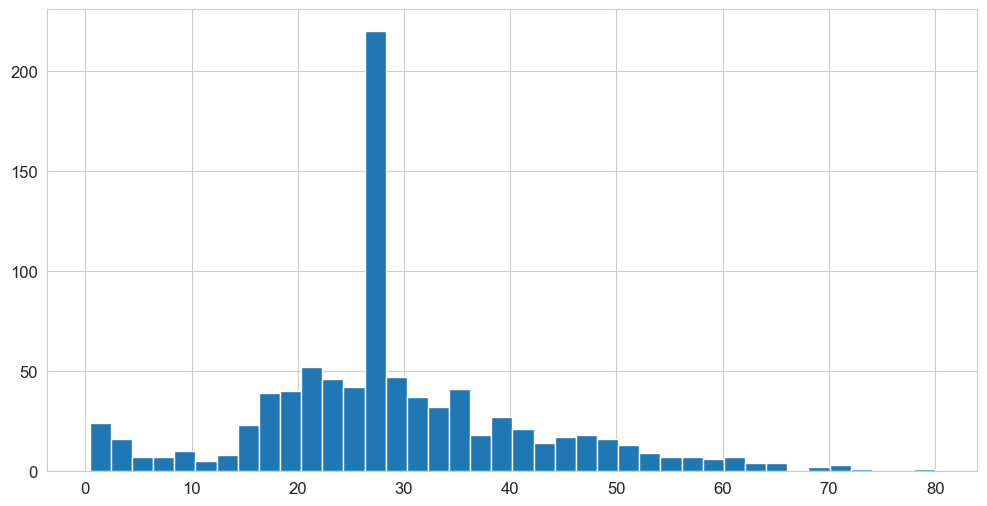

In [14]:
df['age'].hist(bins=40)

### Test de normalidad

In [15]:
# Test de normalidad - Shapiro-Wilk (ideal para muestras pequeñas <5000)
stat_age, p_age = stats.shapiro(df['age'])
print(f"Estadístico de prueba: {stat_age}, p-valor: {p_age:.16f}")
if p_age > 0.05:
    print("La distribución de 'age' es normal.")
else:
    print("La distribución de 'age' no es normal.")


Estadístico de prueba: 0.9541046573646538, p-valor: 0.0000000000000005
La distribución de 'age' no es normal.


In [16]:
# Test de normalidad - D'Agostino and Pearson (ideal para muestras grandes)
stat_fare, p_fare = stats.normaltest(df['fare'])
print(f"Estadístico de prueba: {stat_fare}, p-valor: {p_fare:.33f}")
if p_fare > 0.05:
    print("La distribución de 'fare' es normal.")
else:
    print("La distribución de 'fare' no es normal.")


Estadístico de prueba: 904.5872705326926, p-valor: 0.000000000000000000000000000000000
La distribución de 'fare' no es normal.


In [17]:
#como es la correlacion de age con fare
corr_age_fare = df['age'].corr(method='spearman', other=df['fare'])
print(f"La correlación entre 'age' y 'fare' es: {corr_age_fare}")

La correlación entre 'age' y 'fare' es: 0.12600552124010062


C:\Users\Joaquim\AppData\Local\Temp\ipykernel_27812\3116994377.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['class'], y=df['age'], ax=ax[2], palette='pastel')


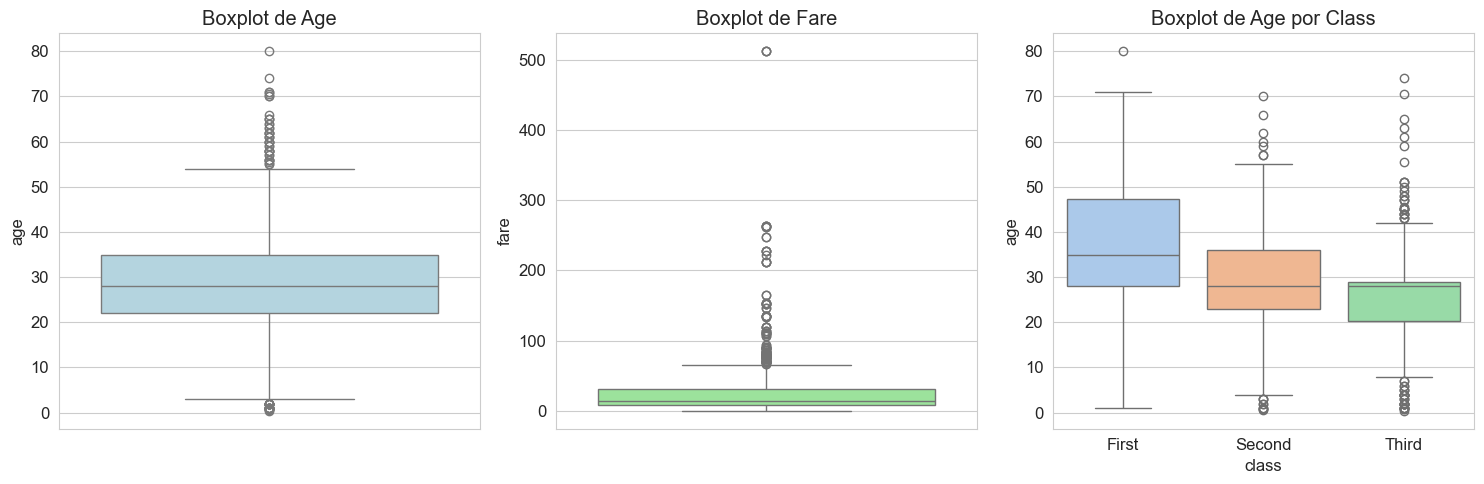

In [18]:
# Muchas veces descubrimos relaciones en los datos aplicando el test correcto segun la distribucion

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#boxplot de age
sns.boxplot(y=df['age'], ax=ax[0], color='lightblue')
ax[0].set_title('Boxplot de Age')
#boxplot de fare
sns.boxplot(y=df['fare'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Fare')
#boxplot horizontal de age por class
sns.boxplot(x=df['class'], y=df['age'], ax=ax[2], palette='pastel')
ax[2].set_title('Boxplot de Age por Class')
plt.tight_layout()

### si la distr no es normal, usamos IQR para outliers

In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [20]:
detect_outliers_iqr(df, 'fare')
#ahora podmeos ver cuantas filas nos estarian desvirtuando los datos

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.5500,S,Third,man,True,C,Southampton,no,False
849,1,1,female,28.0,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False
863,0,3,female,28.0,8,2,69.5500,S,Third,woman,False,C,Southampton,no,False


Si nuestra distribución es normal usamos Z-score para outliers

In [21]:
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

In [22]:
detect_outliers_iqr(df, 'fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.5500,S,Third,man,True,C,Southampton,no,False
849,1,1,female,28.0,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False
863,0,3,female,28.0,8,2,69.5500,S,Third,woman,False,C,Southampton,no,False


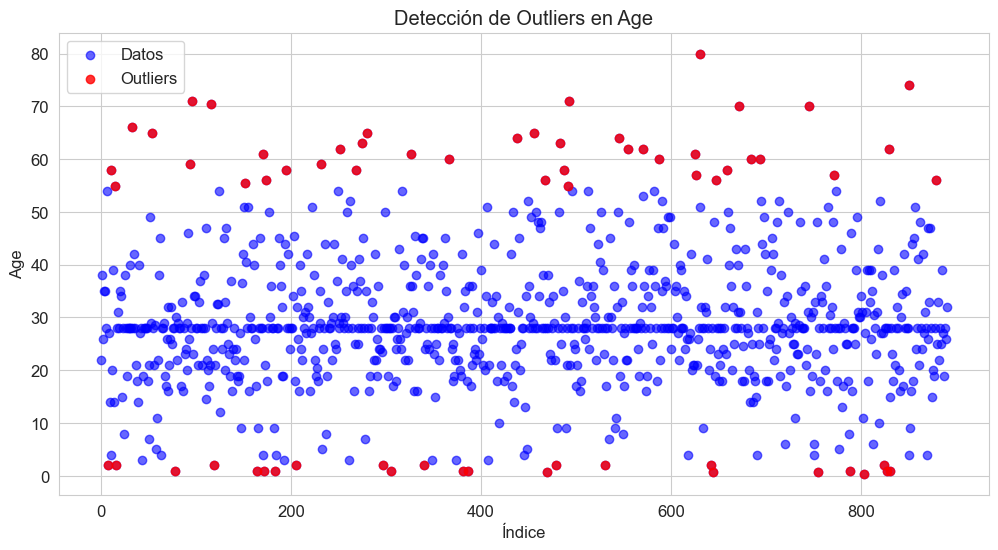

In [23]:
#scatter plot con outliers marcados de age
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.scatter(df.index, df['age'], label='Datos', color='blue', alpha=0.6)
outliers_age = detect_outliers_iqr(df, 'age')
axes.scatter(outliers_age.index, outliers_age['age'], label='Outliers', color='red', alpha=0.8)
axes.set_title('Detección de Outliers en Age')
axes.set_xlabel('Índice')
axes.set_ylabel('Age')
axes.legend()
plt.show()

Estrategias de reparacion de outliers

In [24]:
#Eliminacion de outliers ( USAR CON CUIDADO )
def eliminar_outliers_iqr(data, column1, column2=None, column3=None, column4=None):
    cleaned_data = data.copy()
    columns = [column1, column2, column3, column4]
    
    for column in columns:
        if column is not None:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    
    return cleaned_data

In [25]:
cleaned_df = eliminar_outliers_iqr(df, 'age', 'fare', 'sibsp', 'parch')
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")

Original DataFrame shape: (891, 15)
Cleaned DataFrame shape: (577, 15)


#### winsorizing ( reemplazar outliers por el valor del limite superior o inferrior)
##### Ojo porque esto puede falsear datos dependiendo de las preguntas que le hagamos

In [26]:
def winsorize_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return data

In [27]:
df_copia = df.copy()
df_winsorized = winsorize_outliers_iqr(df_copia, 'fare')
df_winsorized = winsorize_outliers_iqr(df_winsorized, 'age')

In [28]:
len(df_winsorized)

891

C:\Users\Joaquim\AppData\Local\Temp\ipykernel_27812\3877157407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_winsorized['class'], y=df['age'], ax=ax[2], palette='pastel')


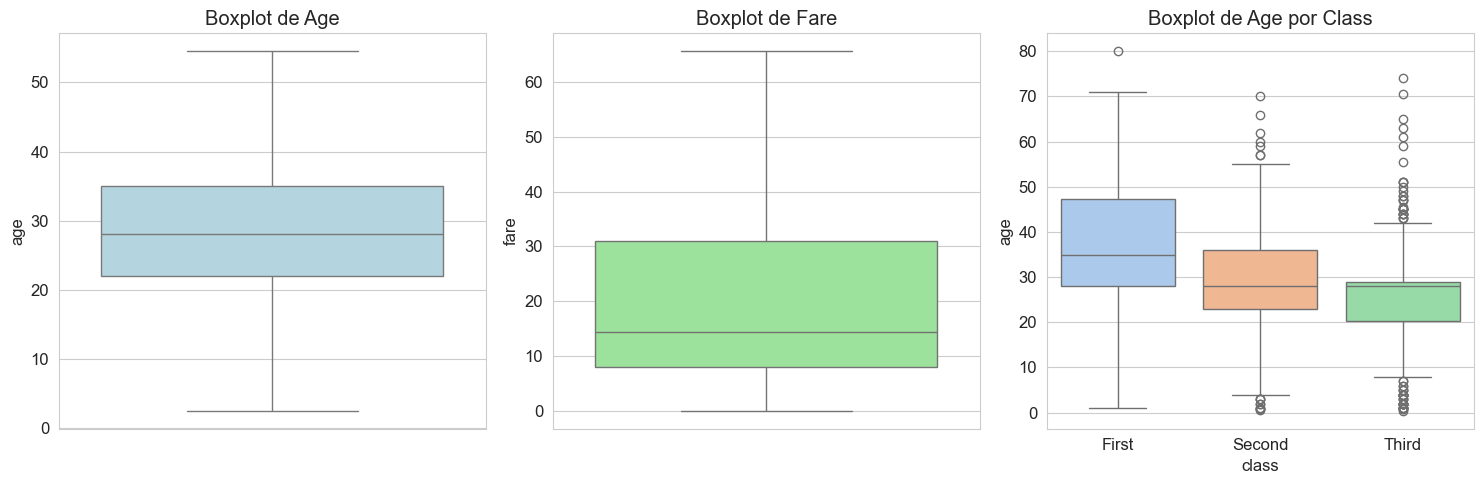

In [29]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#boxplot de age
sns.boxplot(y=df_winsorized['age'], ax=ax[0], color='lightblue')
ax[0].set_title('Boxplot de Age')
#boxplot de fare
sns.boxplot(y=df_winsorized['fare'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Fare')
#boxplot horizontal de age por class
sns.boxplot(x=df_winsorized['class'], y=df['age'], ax=ax[2], palette='pastel')
ax[2].set_title('Boxplot de Age por Class')
plt.tight_layout()

### Transformaciones logaritmicas
#### esto actua sobre la distribucion de los datos, no sobre los outliers en si

In [30]:
def log_transform(data, column):
    data[column] = np.log1p(data[column])  # log1p is used to handle zero values
    return data

df_log = log_transform(df.copy(), 'fare')
df_log = log_transform(df_log, 'age')   

<Axes: >

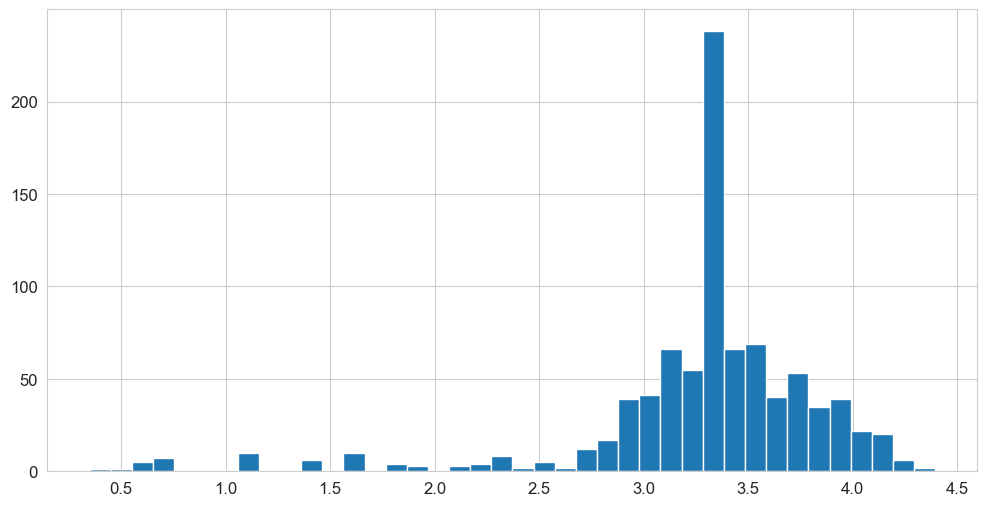

In [31]:
df_log['age'].hist(bins=40)

### Escalado rebusto. 
###### Para definir maximo y minimo. por ejemplo si tenemos valores de 0 a 120, podemos decir que todo vaya del 0 al 1




In [32]:
from sklearn.preprocessing import RobustScaler

# Create a copy of the dataframe to apply robust scaling
df_robust = df.copy()

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply robust scaling to 'age' and 'fare' columns
df_robust[['age', 'fare']] = robust_scaler.fit_transform(df_robust[['age', 'fare']])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

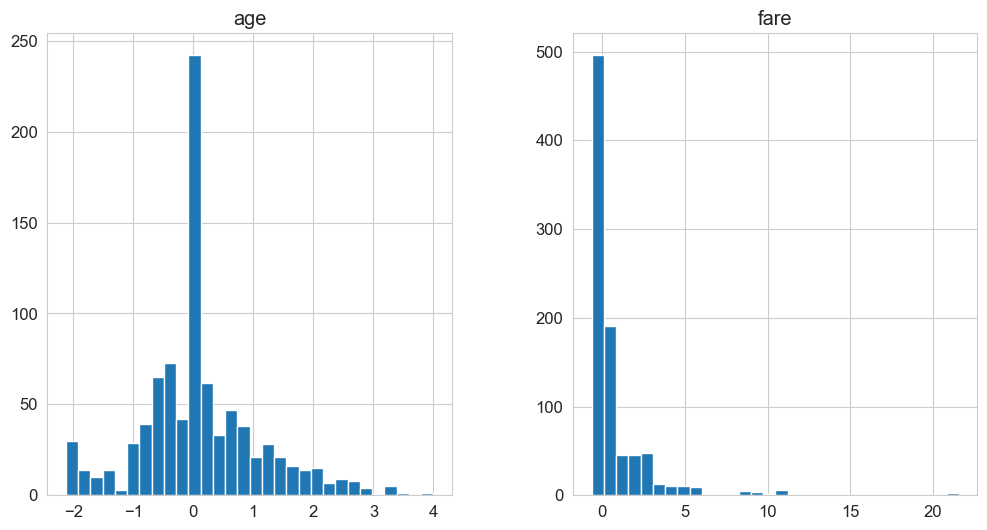

In [33]:
df_robust[['age','fare']].hist(bins=30)